In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from roboflow import Roboflow
from config import ROBOFLOW_API_KEY

PROJECT = "state-of-vehicle-tail-lamp-detection"
VERSION = 1

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace().project(PROJECT)
model = project.version(VERSION).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
# infer on a local image
import os
from glob import glob
sample_img_paths = glob(os.path.join(os.getcwd(), 'data', 'test', '*.jpg'))
print(sample_img_paths)

['/Users/gsethan/Desktop/tail-light-detection/data/test/000151.jpg', '/Users/gsethan/Desktop/tail-light-detection/data/test/000111.jpg', '/Users/gsethan/Desktop/tail-light-detection/data/test/000072.jpg', '/Users/gsethan/Desktop/tail-light-detection/data/test/000002.jpg']


In [37]:
from PIL import Image
import cv2
from matplotlib import cm
import numpy as np


path = sample_img_paths[0]
img = Image.open(path).convert("RGB")
print(type(img))
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(type(img))


input_img = Image.fromarray(np.uint8(img)).convert('RGB')

print(type(input_img))
prediction = model.predict_local_image(input_img)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


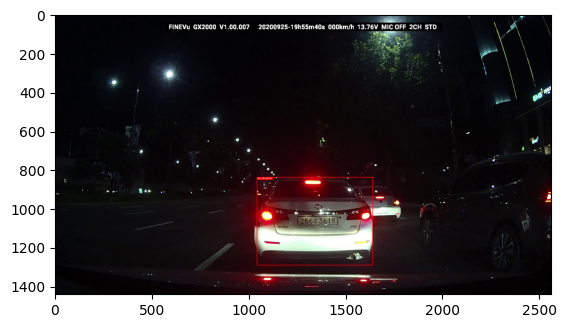

In [40]:
prediction.draw(img)
plt.imshow(img)
plt.show()

In [ ]:
model.webcam(1)

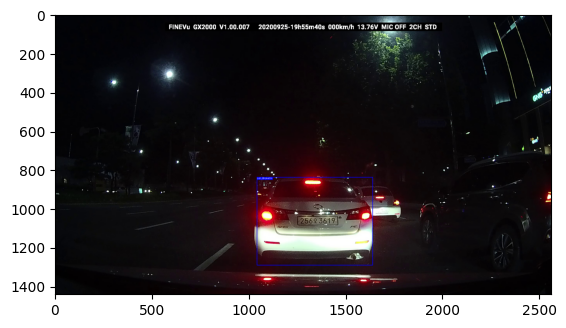

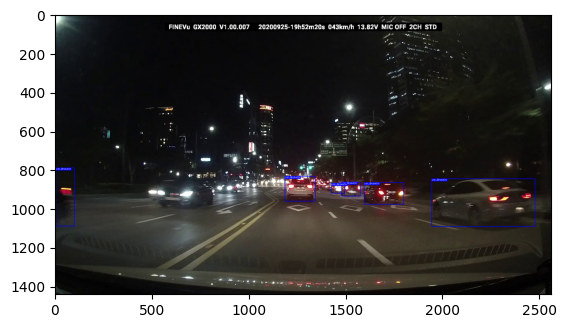

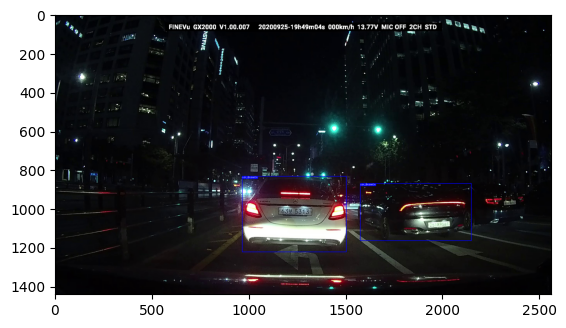

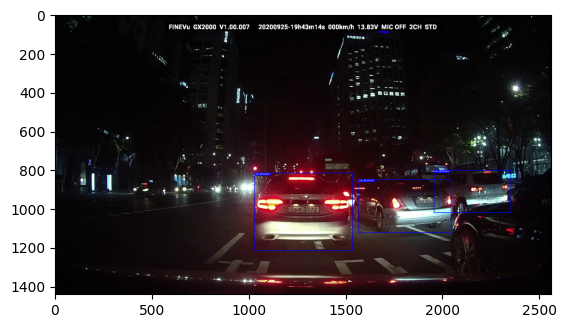

In [13]:
import matplotlib.pyplot as plt
import cv2
for path in sample_img_paths:
    prediction = model.predict(path, confidence=40, overlap=30)
    img = prediction.draw()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [50]:

sample_video_paths = glob(os.path.join(os.getcwd(), 'data', 'test_video', '*.mp4'))
print(sample_video_paths)
cap = cv2.VideoCapture(sample_video_paths[0])

['/Users/gsethan/Desktop/tail-light-detection/data/test_video/night_city.mp4', '/Users/gsethan/Desktop/tail-light-detection/data/test_video/day_high.mp4', '/Users/gsethan/Desktop/tail-light-detection/data/test_video/day_city.mp4', '/Users/gsethan/Desktop/tail-light-detection/data/test_video/night_high.mp4']


In [63]:
import numpy as np

for path in sample_video_paths:
    
    cap = cv2.VideoCapture(path)
    out_path = os.path.join(os.path.dirname(path), os.path.basename(path).split('.mp4')[0]+'_simpleModel.mp4')

    # Check if camera opened successfully
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")
    
    
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    fps = int(cap.get(5))
    
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','P','P','G'), fps, (frame_width,frame_height))
    
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:
        
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # convert to PIL image to input
            input_img = Image.fromarray(np.uint8(frame)).convert('RGB')
            prediction = model.predict_local_image(input_img)
            img = prediction.draw(frame)
            
            out.write(img)
        
            # Press Q on keyboard to  exit
            # if cv2.waitKey(25) & 0xFF == ord('q'):
                # break
            
        else: 
            break
        
    # When everything done, release the video capture object
    cap.release()
    out.release()


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


ConnectionError: ('Connection aborted.', TimeoutError(60, 'Operation timed out'))